In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Listing sheets in Excel files
Whether you like it or not, any working data scientist will need to deal with Excel spreadsheets at some point in time. You won't always want to do so in Excel, however!

Here, you'll learn how to use pandas to import Excel spreadsheets and how to list the names of the sheets in any loaded .xlsx file.

Given an Excel file imported into a variable **`spreadsheet`**, you can retrieve a list of the sheet names using the attribute **`spreadsheet.sheet_names`**.

Specifically, you'll be loading and checking out the spreadsheet 'battledeath.xlsx', modified from the Peace Research Institute Oslo's (PRIO) dataset. This data contains age-adjusted mortality rates due to war in various countries over several years.

In [2]:
# Assign spreadsheet filename: file
file = 'D:/Springboard_DataCamp/data/Importing_Data_in_Python_Part1/battledeath.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

# Print sheet names
print(xl.sheet_names)

['2002', '2004']


## Importing sheets from Excel files
In the previous exercises, you saw that the Excel file contains two sheets, '2002' and '2004'. The next step is to import these.

In this exercise, you'll learn how to import any given sheet of your loaded .xlsx file as a DataFrame. You'll be able to do so by specifying either the sheet's name or its index.

In [3]:
# Load a sheet into a DataFrame by name: df1
df1 = xl.parse('2004')

# Print the head of the DataFrame df1
df1.head()

,War(country),2004
0,Afghanistan,9.451028
1,Albania,0.130354
2,Algeria,3.407277
3,Andorra,0.000000
4,Angola,2.597931


In [4]:
# Load a sheet into a DataFrame by index: df2
df2 = xl.parse(0)

# Print the head of the DataFrame df2
df2.head()

,"War, age-adjusted mortality due to",2002
0,Afghanistan,36.083990
1,Albania,0.128908
2,Algeria,18.314120
3,Andorra,0.000000
4,Angola,18.964560


## Customizing your spreadsheet import
Here, you'll parse your spreadsheets and use additional arguments to skip rows, rename columns and select only particular columns.

The spreadsheet 'battledeath.xlsx' is already loaded as xl.

As before, you'll use the method **`parse()`**. This time, however, you'll add the additional arguments **`skiprows, names and parse_cols`**. These skip rows, name the columns and designate which columns to parse, respectively. 

All these arguments can be assigned to lists containing the specific row numbers, strings and column numbers, as appropriate.

In [5]:
# Parse the first sheet and rename the columns: df1
df1 = xl.parse(0, skiprows=[0], names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
df1.head()

,Country,AAM due to War (2002)
0,Albania,0.128908
1,Algeria,18.314120
2,Andorra,0.000000
3,Angola,18.964560
4,Antigua and Barbuda,0.000000


In [19]:
# Parse the first column of the second sheet and rename the column: df2
df2 = xl.parse(1,  parse_cols=[0], skiprows=[0], names=['Country'])

# Print the head of the DataFrame df2
df2.head()

ValueError: Length mismatch: Expected axis has 2 elements, new values have 1 elements

Not sure why this didn't work, executed in the DataCamp Exercise

## Importing SAS files
In this exercise, you'll figure out how to import a SAS file as a DataFrame using SAS7BDAT and pandas



In [7]:
# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('D:/Springboard_DataCamp/data/Importing_Data_in_Python_Part1/sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
df_sas.head()

,YEAR,P,S
0,1950.0,12.9,181.899994
1,1951.0,11.9,245.000000
2,1952.0,10.7,250.199997
3,1953.0,11.3,265.899994
4,1954.0,11.2,248.500000


Text(0,0.5,'count')

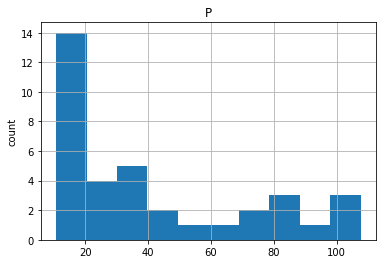

In [8]:
# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')

## Importing Stata files
Here, you'll gain expertise in importing Stata files as DataFrames using the pd.read_stata() function from pandas

In [9]:
# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('D:/Springboard_DataCamp/data/Importing_Data_in_Python_Part1/disarea.dta')

# Print the head of the DataFrame df
df.head()

,wbcode,country,disa1,disa2,disa3,disa4,disa5,disa6,disa7,disa8,...,disa16,disa17,disa18,disa19,disa20,disa21,disa22,disa23,disa24,disa25
0,AFG,Afghanistan,0.00,0.00,0.76,0.73,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.02,0.00,0.00
1,AGO,Angola,0.32,0.02,0.56,0.00,0.0,0.00,0.56,0.0,...,0.0,0.4,0.0,0.61,0.00,0.0,0.99,0.98,0.61,0.00
2,ALB,Albania,0.00,0.00,0.02,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.16
3,ARE,United Arab Emirates,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00
4,ARG,Argentina,0.00,0.24,0.24,0.00,0.0,0.23,0.00,0.0,...,0.0,0.0,0.0,0.00,0.05,0.0,0.00,0.01,0.00,0.11


In [10]:
df.shape

(164, 27)

Text(0,0.5,'Number of countries')

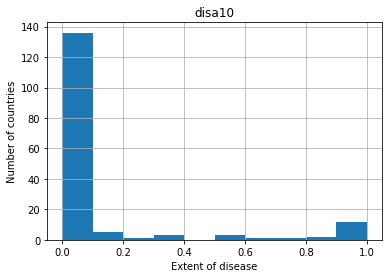

In [11]:
# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')

Text(0,0.5,'Number of countries')

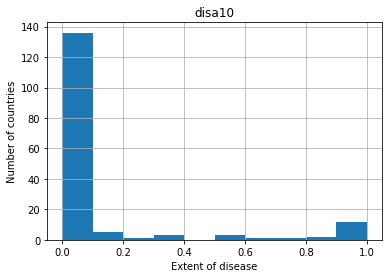

In [12]:
# or more easily
df.hist('disa10')
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')

Text(0,0.5,'Number of countries')

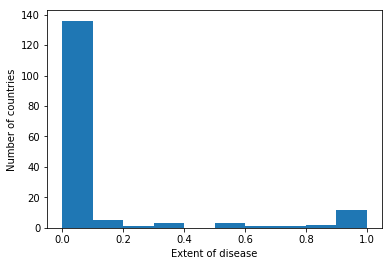

In [13]:
df.disa10.plot( kind='hist')
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')

# Using h5py to import HDF5 files....This Jacks Everything Up!!
The file 'LIGO_data.hdf5' is already in your working directory. In this exercise, you'll import it using the h5py library. You'll also print out its datatype to confirm you have imported it correctly. You'll then study the structure of the file in order to see precisely what HDF groups it contains.

In [ ]:
# Import packages
import h5py

# Assign filename: file
file = 'D:/Springboard_DataCamp/data/Importing_Data_in_Python_Part1/L-L1_LOSC_4_V1-1126259446-32.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

## Extracting data from your HDF5 file
In this exercise, you'll extract some of the LIGO experiment's actual data from the HDF5 file and you'll visualize it.

To do so, you'll need to first explore the HDF5 group 'strain'.


In [ ]:
# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = data['strain']['Strain'].value

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')

## Loading .mat files
In this exercise, you'll figure out how to load a MATLAB file using scipy.io.loadmat() and you'll discover what Python datatype it yields.

In [14]:
# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('D:/Springboard_DataCamp/data/Importing_Data_in_Python_Part1/albeck_gene_expression.mat')

# Print the datatype type of mat
print(type(mat))

<class 'dict'>


## The structure of .mat in Python
Here, you'll discover what is in the MATLAB dictionary that you loaded in the previous exercise.

In [15]:
# Print the keys of the MATLAB dictionary
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])

 Most of these keys (in fact the ones that do NOT begin and end with '__') are variables from the corresponding MATLAB environment.

In [16]:
# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

<class 'numpy.ndarray'>


In [17]:
# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['CYratioCyt']))

(200, 137)


Text(0,0.5,'normalized fluorescence (measure of expression)')

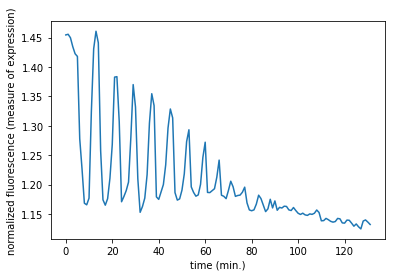

In [18]:
# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')